In [1]:
library(tidyverse)
library(cowplot)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




# Load data

In [2]:
real_df <- bind_rows(
    read_tsv("plot_data/heritability.tsv", show_col_types = F) %>%
        mutate(type = "Heritability") %>%
        select(type, value = h2),
    read_tsv("plot_data/phenotypic_correlation.tsv", show_col_types = F) %>%
        mutate(type = "Phenotypic correlation") %>%
        select(type, value = r) %>%
        drop_na,
    read_tsv("plot_data/genetic_correlation.tsv", show_col_types = F) %>%
        mutate(type = "Genetic correlation") %>%
        select(type, value = rg)
)

real_df %>% head(2)

type,value
<chr>,<dbl>
Heritability,0.118519
Heritability,0.040428


In [3]:
sim_df <- bind_rows(
    read_tsv("plot_data/sim_heritability.tsv", show_col_types = F) %>%
        mutate(type = "Heritability") %>%
        select(type, value = h2),
    read_tsv("plot_data/sim_phenotypic_correlation.tsv", show_col_types = F) %>%
        mutate(type = "Phenotypic correlation") %>%
        select(type, value = r),
    read_tsv("plot_data/sim_genetic_correlation.tsv", show_col_types = F) %>%
        mutate(type = "Genetic correlation") %>%
        select(type, value = rg)
)

sim_df %>% head(2)

type,value
<chr>,<dbl>
Heritability,0.016275
Heritability,0.009196


# Plot

In [4]:
plot_df <- bind_rows(
    real_df %>% mutate(kind = "Real data"),
    sim_df %>% mutate(kind = "Simulation")
)

plot_df %>% head(2)

type,value,kind
<chr>,<dbl>,<chr>
Heritability,0.118519,Real data
Heritability,0.040428,Real data


In [5]:
plot_df %>%
    group_by(kind, type) %>%
    summarize(
        mean = mean(value),
        median = median(value),
        .groups = "drop"
    )

kind,type,mean,median
<chr>,<chr>,<dbl>,<dbl>
Real data,Genetic correlation,0.50348678,0.49335000
Real data,Heritability,0.05572655,0.04700250
Real data,Phenotypic correlation,0.11105420,0.09537569
Simulation,Genetic correlation,0.28936974,0.23044473
Simulation,Heritability,0.04516705,0.01354500
Simulation,Phenotypic correlation,0.02964997,0.03307570


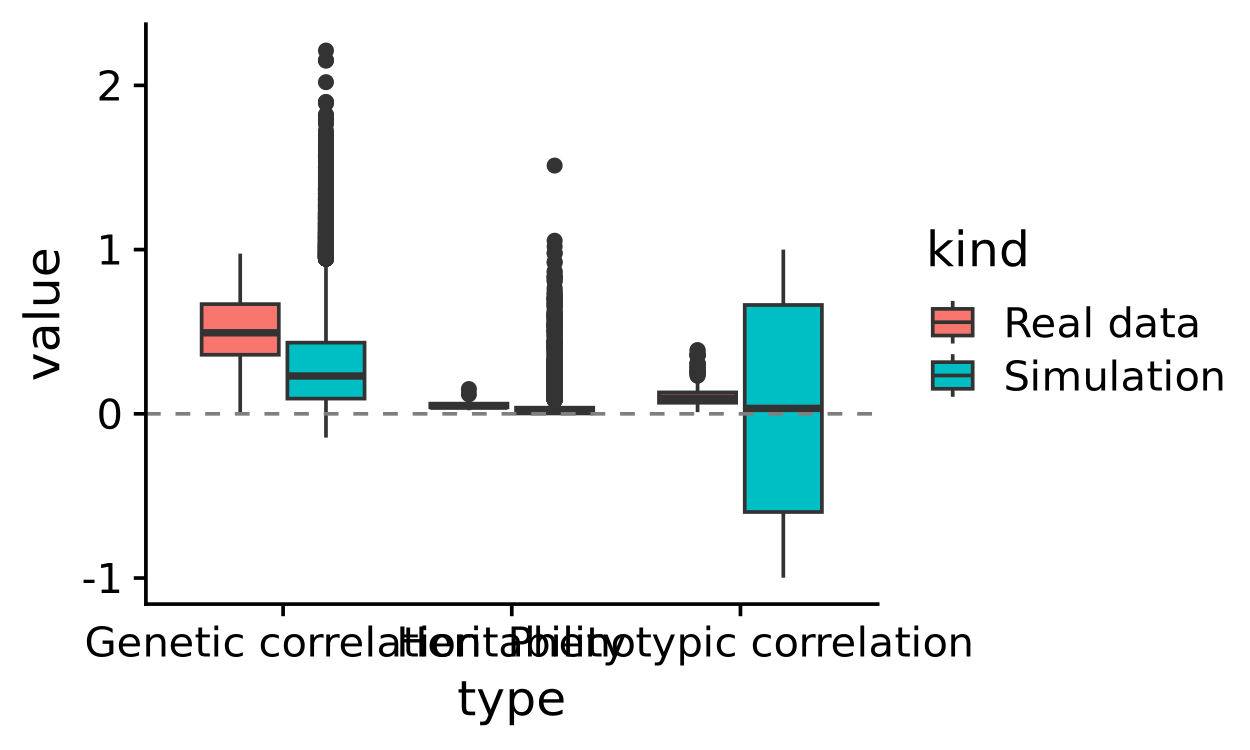

In [6]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 250)

plot_df %>%
    ggplot(aes(x = type, y = value, fill = kind)) +
    geom_boxplot() +
    geom_hline(yintercept = 0, linetype = "dashed", color = "grey50") +
    theme_cowplot()

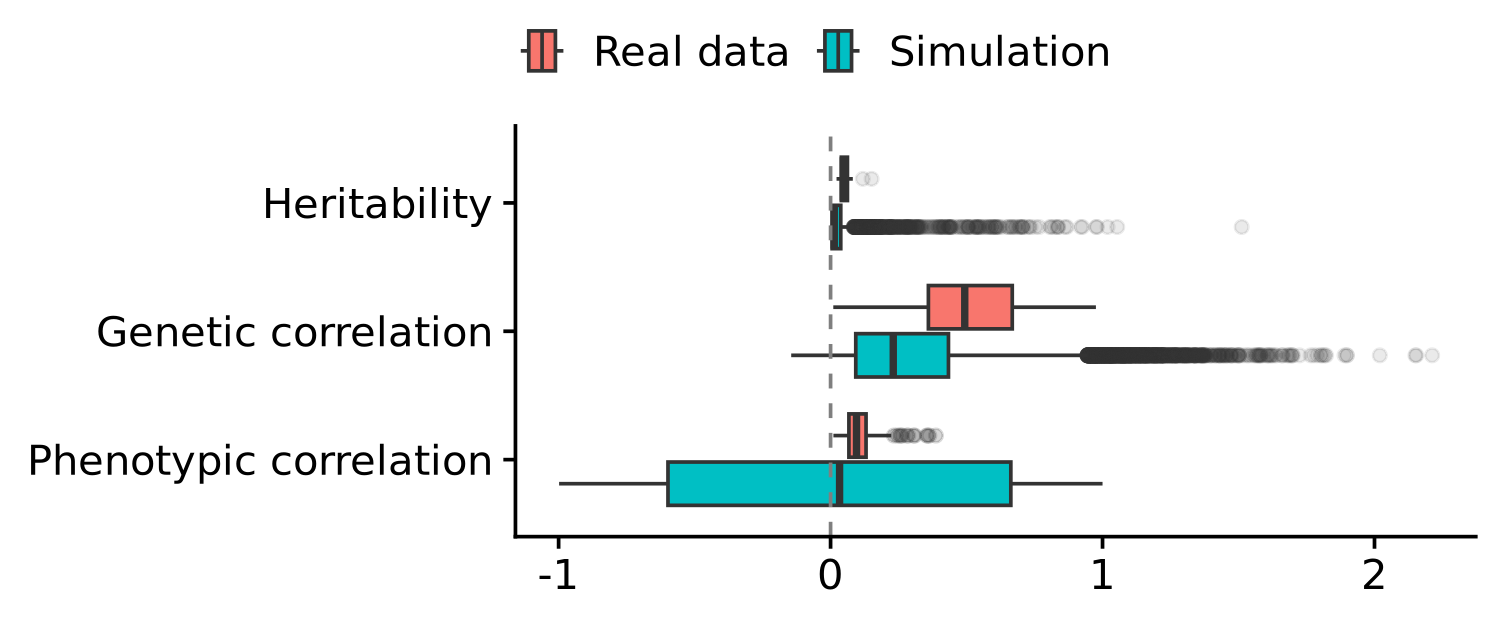

In [7]:
options(repr.plot.width = 6, repr.plot.height = 2.5, repr.plot.res = 250)

distribution_plot <- plot_df %>%
    ggplot(aes(y = type, x = value, fill = kind)) +
    geom_boxplot(position = position_dodge2(reverse = T), outlier.alpha = 0.1) +
    geom_vline(xintercept = 0, linetype = "dashed", color = "grey50") +
    theme_cowplot() +
    theme(
        axis.title = element_blank(),
        legend.position = "top",
        legend.title = element_blank()
    ) +
    scale_y_discrete(limits = c("Phenotypic correlation", "Genetic correlation", "Heritability"))

save_plot("img/distributions.png", distribution_plot, base_width = 6, base_height = 2.5, dpi = 400, bg = "white")

distribution_plot